In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify as mc

import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

# Cricket Pitches in the USA

In [2]:
# makes a dataframe of all the cricket pitches from the overpass API
cgdf = gpd.read_file('./data/cricketUSA.geojson')
cgdf_points = cgdf.copy()

#some of the pitches have full geometry, but we only really need points on the map
cgdf_points['geometry'] = cgdf_points['geometry'].centroid


/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [3]:
world_map = gpd.read_file('./maps/ne_10m_admin_1_states_provinces_lakes.shp')
us_states = world_map.query('admin in ["United States of America", "Puerto Rico"]').set_index('name')
#makes a dataframe of all continental US States

In [4]:
def usa_state_finder(pitch):
    '''goes through each state until it finds the state the pitch is in,
    could probably be more efficient?
    '''
    for state in us_states.iterrows():
        if pitch['geometry'].within(state[1]['geometry']):
            return state[1].name

In [5]:
us_pitches = cgdf.apply(usa_state_finder, axis=1).value_counts()

# Adds a column to the "US States" data frame, adds a column counting cricket pitches
for pitch in us_pitches.items():
    us_states.at[pitch[0], 'cricket pitches'] = pitch[1]
us_states = us_states.fillna(0) #turns NaN into 0

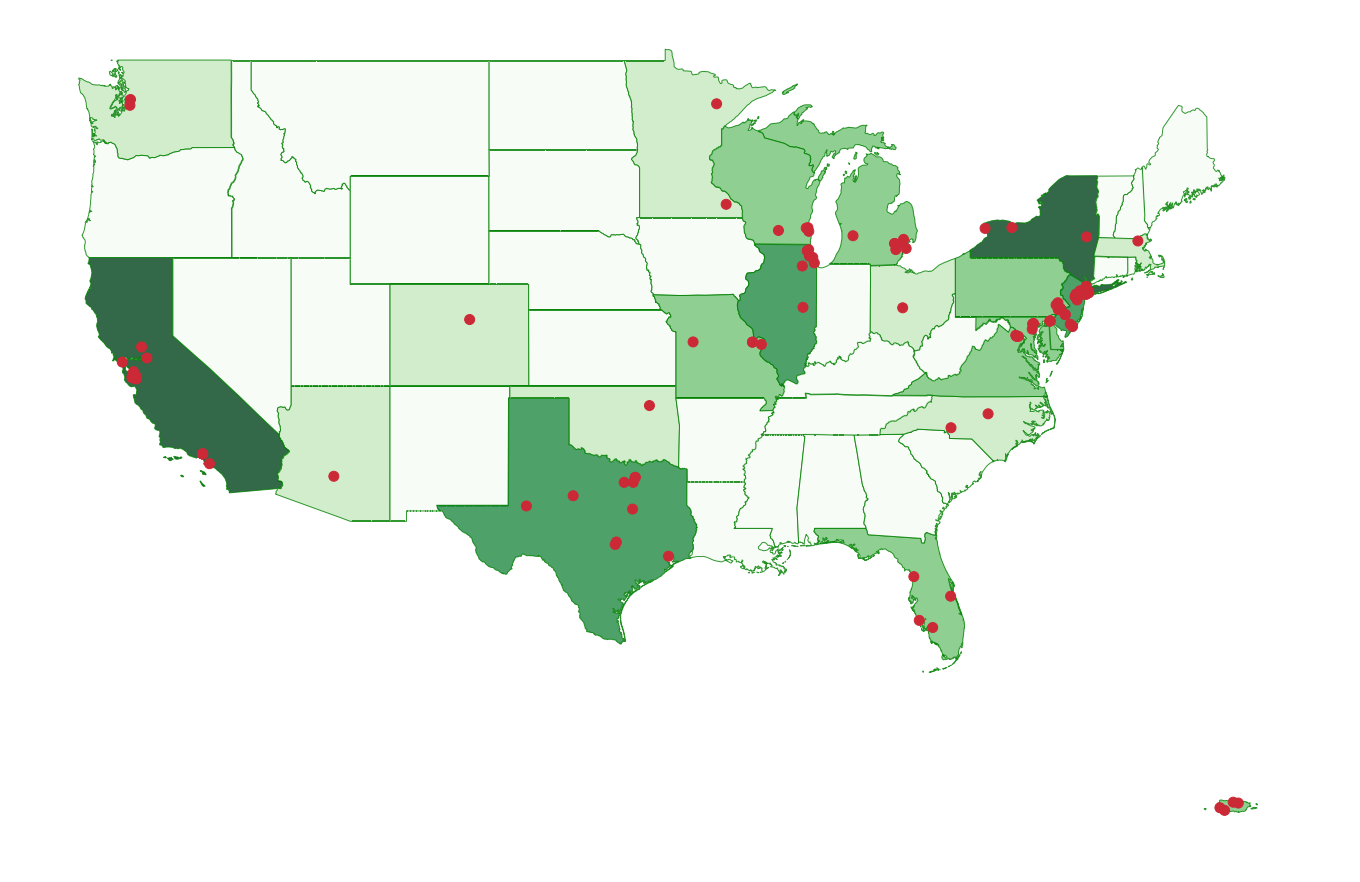

In [6]:
scheme = mc.UserDefined(us_states['cricket pitches'], bins=[0,2,6,12,24])
ax = gplt.choropleth(us_states, 
                figsize=(24, 24),
                hue='cricket pitches',
                projection=gcrs.Mercator(),
                cmap='Greens',
                scheme=scheme,
                alpha = 0.8,
                edgecolor='green',
                linewidth=1)

gplt.pointplot(cgdf_points,
               ax=ax,
               color='#cc2937',
               projection=gcrs.Mercator(),
               marker="o",
               s=10,
               zorder=10)

plt.savefig('./output/usa_cricket.png')

# American Football Pitches in India

In [7]:
in_states = world_map.query('admin in ["India"]').set_index('name')

In [8]:
# makes a dataframe of all the cricket pitches from the overpass API
af_gdf = gpd.read_file('./data/af_India.geojson')
af_gdf_points = af_gdf.copy()

#some of the pitches have full geometry, but we only really need points on the map
af_gdf_points['geometry'] = af_gdf_points['geometry'].centroid


/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [9]:
def india_state_finder(pitch):
    '''goes through each state until it finds the state the pitch is in,
    could probably be more efficient?
    '''
    for state in in_states.iterrows():
        if pitch['geometry'].within(state[1]['geometry']):
            return state[1].name

In [10]:
in_pitches = af_gdf.apply(india_state_finder, axis=1).value_counts()

for pitch in in_pitches.items():
    in_states.at[pitch[0], 'american football pitches'] = pitch[1]
in_states = in_states.fillna(0) #turns NaN into 0

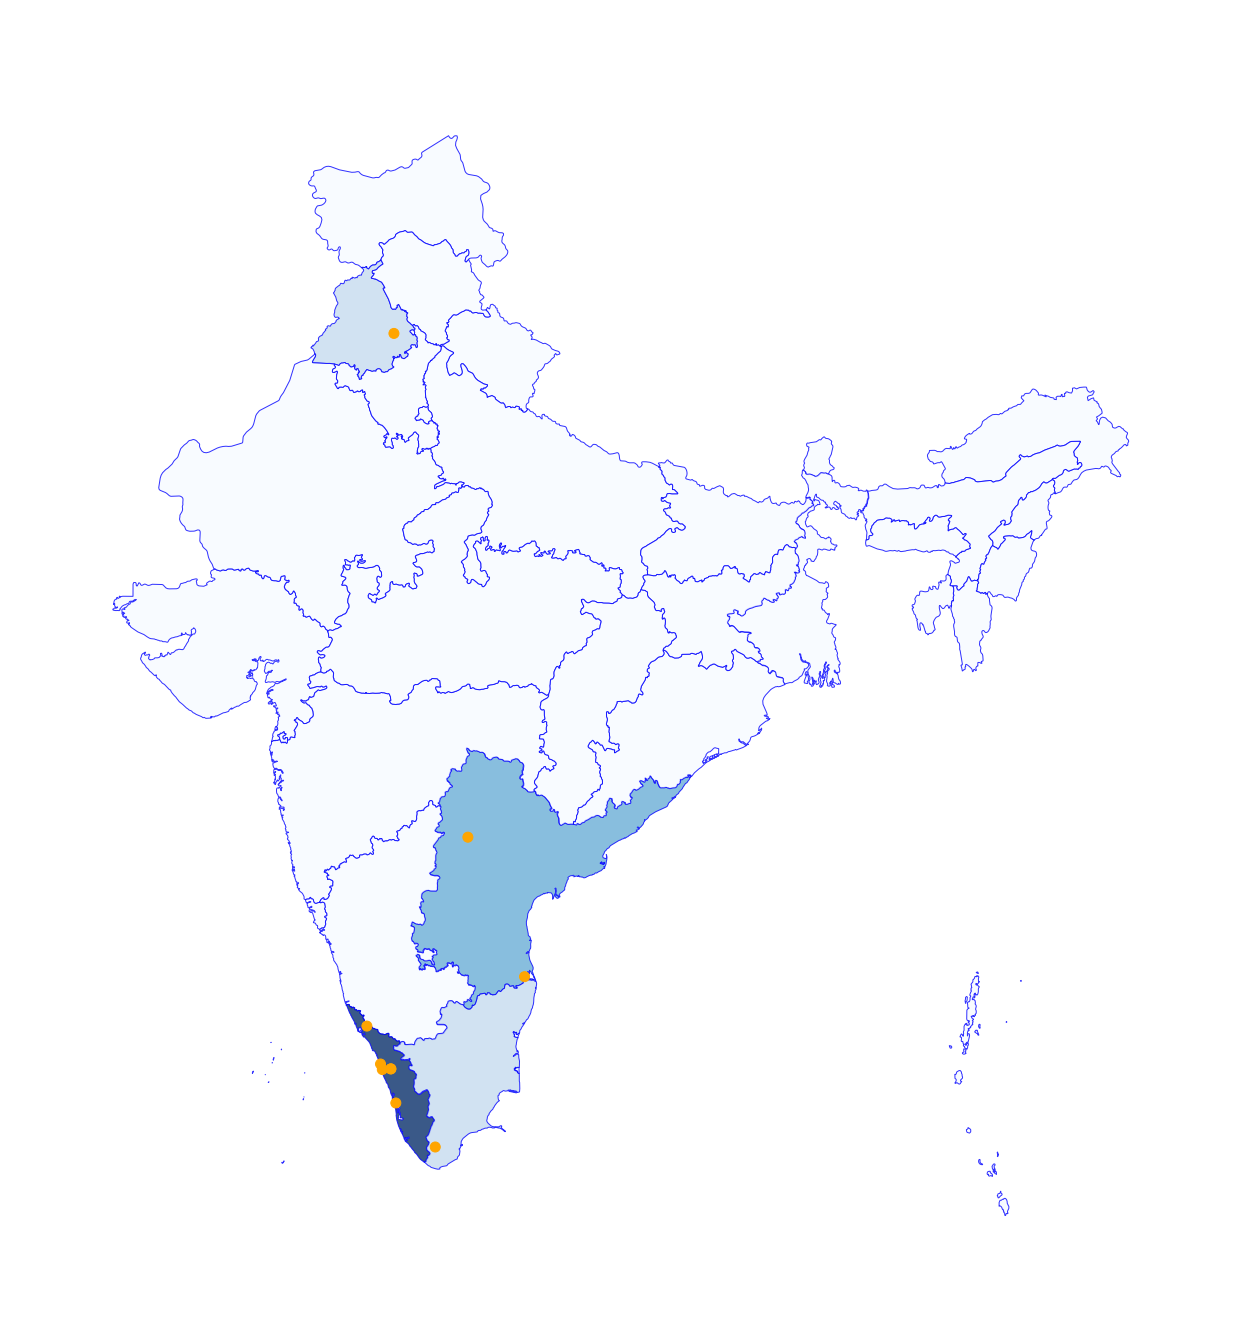

In [11]:
scheme = mc.UserDefined(in_states['american football pitches'], bins=[0,1,3,5,7])

in_ax = gplt.pointplot(af_gdf_points,
                figsize=(24, 24),
                color='orange',
                projection=gcrs.Mercator(),
                marker="o",
                s=10,
                zorder=8,
                )

gplt.choropleth(in_states, 
                hue='american football pitches',
                projection=gcrs.Mercator(),
                cmap='Blues',
                scheme=scheme,
                alpha = 0.8,
                edgecolor='blue',
                linewidth=1,
                ax=in_ax
                )

plt.savefig('./output/india_american_football.png')